# Factors affecting the density of traffic on the I-94

In this project we will use python's visualization power to analyse factors, such as weather, time of day etc, that impact traffic in I-94. Our goal is the determine a few indicators of heavy traffic from the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
traffic_df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
pd.concat([traffic_df.head(5),traffic_df.tail(5)], axis=0)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [4]:
traffic_df.describe(include='all')

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
count,48204,48204.000000,48204.000000,48204.000000,48204.000000,48204,48204,48204,48204.000000
unique,12,NaN,NaN,NaN,NaN,11,38,40575,NaN
top,None,NaN,NaN,NaN,NaN,Clouds,sky is clear,2013-04-18 22:00:00,NaN
freq,48143,NaN,NaN,NaN,NaN,15164,11665,6,NaN
mean,NaN,281.205870,0.334264,0.000222,49.362231,NaN,NaN,NaN,3259.818355
std,NaN,13.338232,44.789133,0.008168,39.015750,NaN,NaN,NaN,1986.860670
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
25%,NaN,272.160000,0.000000,0.000000,1.000000,NaN,NaN,NaN,1193.000000
50%,NaN,282.450000,0.000000,0.000000,64.000000,NaN,NaN,NaN,3380.000000
75%,NaN,291.806000,0.000000,0.000000,90.000000,NaN,NaN,NaN,4933.000000


# 2. Analyzing Traffic Volume

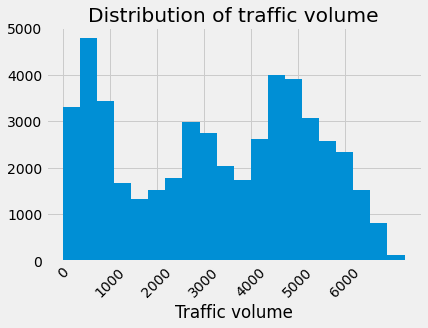

In [5]:
plt.style.use('fivethirtyeight')
traffic_df['traffic_volume'].plot.hist(bins=20, rot=45)
plt.title('Distribution of traffic volume')
plt.xlabel('Traffic volume')
plt.xticks([0,1000,2000, 3000, 4000, 5000, 6000])
plt.ylabel('')
plt.show()

About 25% of the time, there were only 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction. However, about 25% of the time, the traffic volume was four times as much (4,933 cars or more).

- Traffic denisty between 0-1000 and 4500-5000 seem to peak the highest in the distribution.
- My hypothesis is that the time of the day may influence traffic, with it being highest during daytime relative to nighttime.

In [6]:
traffic_df['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

# 3. Traffic Volume: Day vs. Night

2012-10-02 09:00:00	5545

In [7]:
traffic_df['date_time'] = pd.to_datetime(traffic_df['date_time'],format='%Y-%m-%d %H:%M:%S')

In [8]:
traffic_df['traffic_hour'] = traffic_df['date_time'].dt.hour

In [9]:
traffic_daytime = traffic_df[(traffic_df['traffic_hour'] >= 7) & (traffic_df['traffic_hour'] < 19)]
traffic_nighttime = traffic_df[(traffic_df['traffic_hour']>=(19)) | (traffic_df['traffic_hour'] < 7)]

# 4. Traffic Volume: Day vs. Night (II)

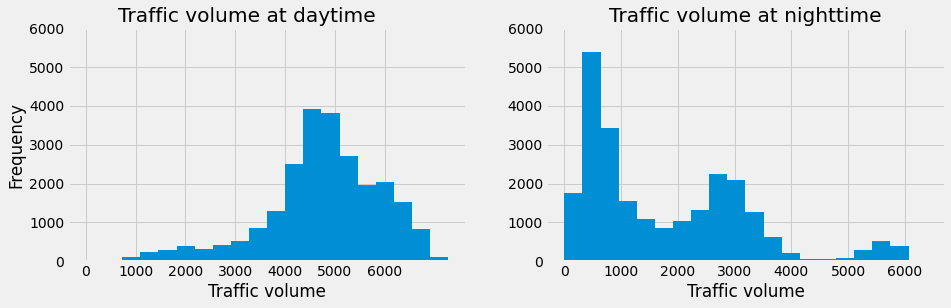

In [10]:
plt.figure(figsize=(14,4))
plt.subplot(1, 2, 1)
traffic_daytime['traffic_volume'].plot.hist(bins=20, rot=0)
plt.title('Traffic volume at daytime', x=0.45)
plt.xlabel('Traffic volume')
plt.xticks([0,1000,2000, 3000, 4000, 5000, 6000])
plt.ylim(0,6000)
plt.ylabel('Frequency', x=-1)
# plt.show()

plt.subplot(1, 2, 2)
traffic_nighttime['traffic_volume'].plot.hist(bins=20, rot=0)
plt.title('Traffic volume at nighttime')
plt.xlabel('Traffic volume')
plt.xticks([0,1000,2000, 3000, 4000, 5000, 6000])
plt.ylim(0,6000)
plt.ylabel('')
plt.show()

- During daytime the shape of the histogram is left skewed, meaning most of the distribution lies to the right hand side of the plot, between 4000-5000. Whereas, during nighttime the distribution is right skewed where the distribution accumulates to the left side of the plot between 0-1000.
- During daytime the high values can be attributed to people heading to work. The traffic during nighttime can be attributed to contruction works which usually happens at night.

In [11]:
print(traffic_daytime['traffic_volume'].describe())
print(traffic_nighttime['traffic_volume'].describe())

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64
count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


The histogram that shows the distribution of traffic volume during the day is left skewed. This means that most of the traffic volume values are high — there are 4,252 or more cars passing the station each hour 75% of the time (because 25% of values are less than 4,252).

The histogram displaying the nighttime data is right skewed. This means that most of the traffic volume values are low — 75% of the time, the number of cars that passed the station each hour was less than 2,819.

# 5. Time Indicators

In [12]:
traffic_daytime['month'] = traffic_daytime['date_time'].dt.month
by_month = traffic_daytime.groupby('month')['traffic_volume'].mean()
by_month

/Users/ravirajkakati/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

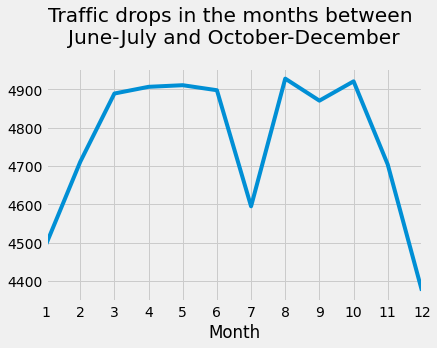

In [13]:
by_month.plot()
plt.xlabel('Month')
plt.xlim(1, 12)
plt.xticks(np.arange(1,13))
plt.title('Traffic drops in the months between \nJune-July and October-December', y = 1.08)
plt.show()

- The average seems to drop between months June and July and again in the months October to December.
- The drop at the year end makes sense due to holidays, as most people wouldn't be working around that time. The reason for drop between June-July is up for speculation.
- Traffic remains around ~4900 for the remaining months.

Is there anything special about July? Is traffic significantly less heavy in July each year?
To answer the last question, let's see how the traffic volume changed each year in July

In [14]:
unique_years = dict()
for i in np.arange(len(traffic_daytime['date_time'].dt.year.unique())):
    unique_years[i+1] = traffic_daytime['date_time'].dt.year.unique()[i]
unique_years

{1: 2012, 2: 2013, 3: 2014, 4: 2015, 5: 2016, 6: 2017, 7: 2018}

In [15]:
traffic_daytime['year'] = traffic_daytime['date_time'].dt.year

/Users/ravirajkakati/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


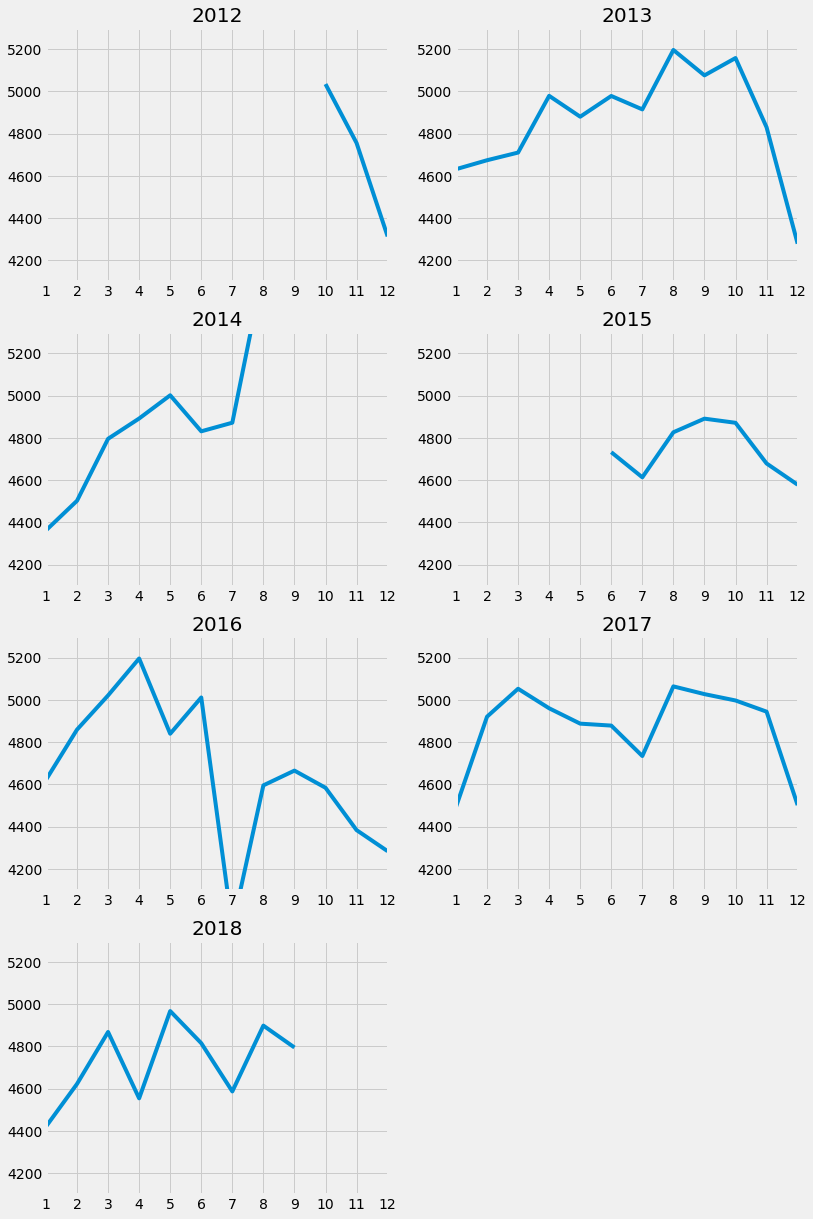

In [16]:
plt.figure(figsize=(12,20))
for i,yr in unique_years.items():
    by_year_month = traffic_daytime.loc[traffic_daytime['year']==yr]
    by_month = by_year_month.groupby('month')['traffic_volume'].mean()
    plt.subplot(4,2,i)
    by_month.plot()
    plt.xlabel('')
    plt.xlim(1, 12)
    plt.xticks(np.arange(1,13))
    plt.ylim(4100, 5300)
    plt.title(label=yr)
plt.show()

- There is no data prior to October 2012, but in 2013 and 2014 traffic seems to be following the same trend in general during summers.
- The pattern of a sudden drop in the month of July happened only in 2016, when there was big construction project that happened during that year. (https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696)

# 6. Time Indicators (II)

In [17]:
traffic_daytime['dayofweek'] = traffic_daytime['date_time'].dt.dayofweek
by_dayofweek = traffic_daytime.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']

/Users/ravirajkakati/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

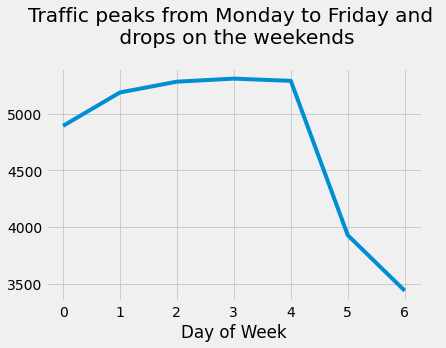

In [18]:
by_dayofweek['traffic_volume'].plot()
plt.xlabel('Day of Week')
# plt.xlim(1, 12)
# plt.xticks(np.arange(0,7))
plt.title('Traffic peaks from Monday to Friday and \n drops on the weekends', y = 1.08)
plt.show() 

- Traffic is above 5000 on all the weekdays except for Monday.
- It drops below 4000 during the weekends.

# 7. Time Indicators (III)

In [19]:
traffic_daytime['hour'] = traffic_daytime['date_time'].dt.hour
bussiness_days = traffic_daytime.copy()[traffic_daytime['dayofweek'] <= 4] # 4 == Friday
weekend = traffic_daytime.copy()[traffic_daytime['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


/Users/ravirajkakati/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/Users/ravirajkakati/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


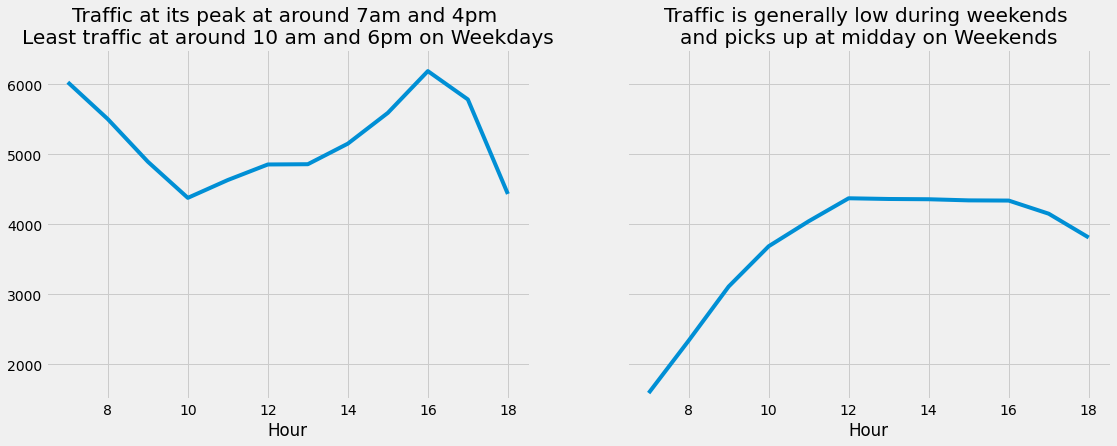

In [20]:
plt.figure(figsize=(17, 6))
plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot()
plt.xlabel('Hour')
plt.ylim(1500, 6500)
plt.title('Traffic at its peak at around 7am and 4pm \nLeast traffic at around 10 am and 6pm on Weekdays')

plt.subplot(1, 2, 2, sharey=plt.subplot(1, 2, 1))
by_hour_weekend['traffic_volume'].plot()
plt.xlabel('Hour')
plt.ylim(1500, 6500)
plt.title('Traffic is generally low during weekends \nand picks up at midday on Weekends')
plt.show()

##### Weekdays
- During business days the highest traffic is observed at the highest during the time 7am and 4pm which can is most likely the times when people travel to and back from work. Volumes over 6000 cars
- it is the lowest, below 4500, at 10am and 6 pm.

##### Weekends 
- Relative to weekdays, the traffic on the weekends is always below 4500. 
- it starts picking up a little late between 10am and 12pm and then stays constant until 4pm, after which we see a gradual decline.

### To summarize, we found a few time-related indicators of heavy traffic:
- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7 and 16.

# 8. Weather Indicators

In [21]:
corr_mat = traffic_daytime[['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main', 'weather_description']].corr()
corr_mat

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
traffic_volume,1.000000,0.128317,0.003697,0.001265,-0.032932
temp,0.128317,1.000000,0.010815,-0.019286,-0.135519
rain_1h,0.003697,0.010815,1.000000,-0.000091,0.004993
snow_1h,0.001265,-0.019286,-0.000091,1.000000,0.027721
clouds_all,-0.032932,-0.135519,0.004993,0.027721,1.000000


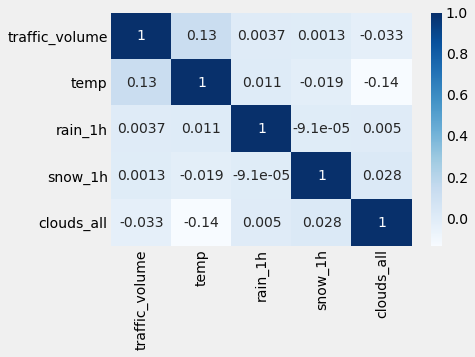

In [22]:
sns.heatmap(corr_mat, xticklabels=corr_mat.columns, yticklabels=corr_mat.columns, annot=True, cmap = 'Blues')
plt.show()

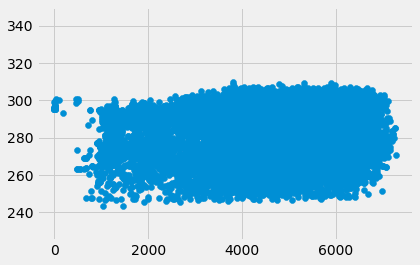

In [23]:
plt.scatter(data=traffic_daytime, x='traffic_volume', y = 'temp')
plt.ylim(225,350)
plt.show()

- From the heatmap of the correlation plot we observe that traffic is not strongly related to any of the weather factors, but amongst the 7 of them, tempearature has a strongest positive correlation to the traffic.
- Meaning, at higher temperatures the traffic increases a little bit and decreases with lower temperatures.
- However, this relationship is very weak and cannot be generalized.

# 9. Weather Types

In [24]:
by_weather_main = traffic_daytime.groupby('weather_main').mean()
by_weather_description = traffic_daytime.groupby('weather_description').mean()

In [25]:
print(by_weather_main['traffic_volume'])
print("\n")
print(by_weather_description['traffic_volume'])

weather_main
Clear           4778.416260
Clouds          4865.415996
Drizzle         4837.212911
Fog             4372.491713
Haze            4609.893285
Mist            4623.976475
Rain            4815.568462
Smoke           4564.583333
Snow            4396.321183
Squall          4211.000000
Thunderstorm    4648.212860
Name: traffic_volume, dtype: float64


weather_description
SQUALLS                                4211.000000
Sky is Clear                           4919.009390
broken clouds                          4824.130326
drizzle                                4737.330935
few clouds                             4839.818023
fog                                    4372.491713
freezing rain                          4314.000000
haze                                   4609.893285
heavy intensity drizzle                4738.586207
heavy intensity rain                   4610.356164
heavy snow                             4411.681250
light intensity drizzle                4890.164049
light in

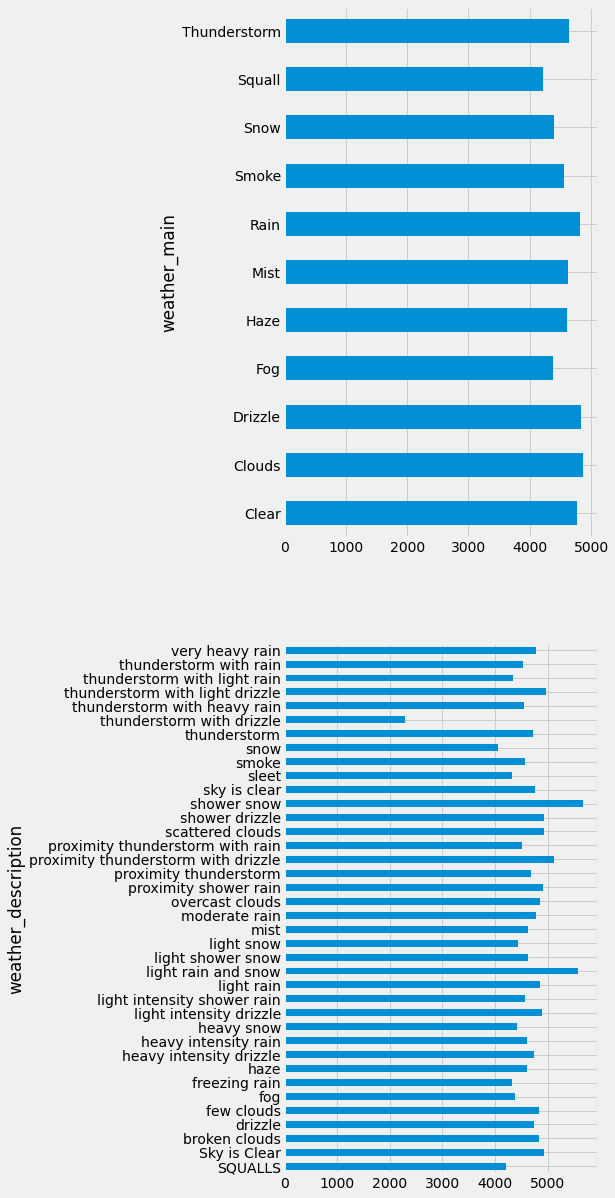

In [26]:
plt.subplot(2,1,1)
by_weather_main['traffic_volume'].plot.barh() 

plt.subplot(2,1,2)
by_weather_description['traffic_volume'].plot.barh(figsize=(5,20)) 
plt.show()

It looks like there are three weather types where traffic volume exceeds 5,000:
- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle

It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.

# Conclusion
In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

Time indicators
- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to the weekends.
- On business days, the rush hours are around 7 and 16.

Weather indicators
- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle